### Generate data

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
from mlscratch.utils import train_test_split

# --- Reproducibility ---
rng = np.random.default_rng(0)

# --- Dataset parameters ---
n_data = 100
c1, c2, c3 = [0, 0], [3, 3], [0, 4]
sigma = np.array([[0.5, 0],
                  [0, 0.5]])   # covariance (symmetric, PD)

# --- Generate Gaussian clusters ---
X1 = rng.multivariate_normal(c1, sigma, size=n_data)
X2 = rng.multivariate_normal(c2, sigma, size=n_data)
X3 = rng.multivariate_normal(c3, sigma, size=n_data)

y1 = np.zeros(n_data, dtype=np.int64)
y2 = np.ones(n_data, dtype=np.int64)
y3 = np.ones(n_data, dtype=np.int64) * 5   # intentionally non-contiguous label

X = np.r_[X1, X2, X3]
y = np.r_[y1, y2, y3]

# --- Train/test split (80/20) ---
X_train, y_train, X_test, y_test = train_test_split(X, y)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Train a linear (softmax regression) model and a decision tree model

In [3]:
from mlscratch.softmax_regression import SoftmaxRegression
from mlscratch.decision_tree_classifier import DecisionTreeClassifier
# ----- Train models -----
softmax = SoftmaxRegression()
softmax.fit(X_train, y_train)

train_score = softmax.score(X_train, y_train)
test_score = softmax.score(X_test, y_test)
print("----- Softmax model ----------")
print(f"Training accuracy: {train_score:.3f}")
print(f"Test accuracy:     {test_score:.3f}")
print(f"Classes learned:   {softmax.classes_}")

tree = DecisionTreeClassifier(max_depth=5, criterion="gini")
tree.fit(X_train, y_train)
train_score = tree.score(X_train, y_train)
test_score = tree.score(X_test, y_test)
print("----- Decision tree model ----------")
print(f"Training accuracy: {train_score:.3f}")
print(f"Test accuracy:     {test_score:.3f}")
print(f"Classes learned:   {tree.classes_}")


----- Softmax model ----------
Training accuracy: 0.992
Test accuracy:     0.950
Classes learned:   [0 1 5]
----- Decision tree model ----------
Training accuracy: 1.000
Test accuracy:     0.967
Classes learned:   [0 1 5]


### Plot result

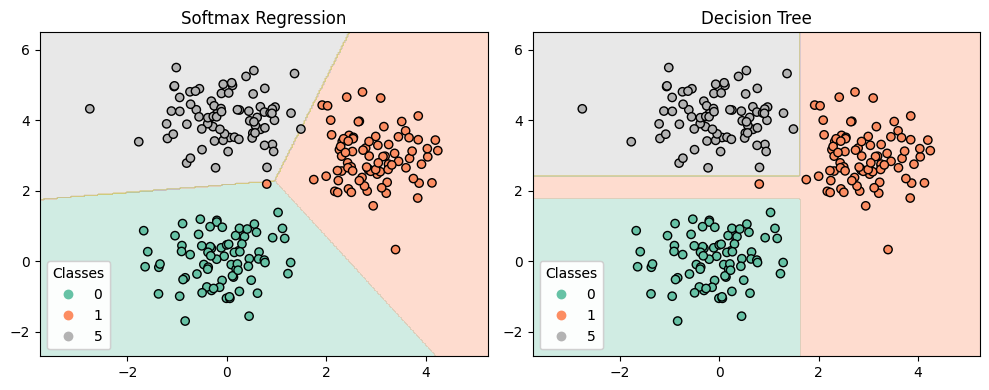

In [5]:
import matplotlib.pyplot as plt
from mlscratch.utils import plot_decision_boundary
# Side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

X_plot = X_train
y_plot = y_train
plot_decision_boundary(softmax, X_plot, y_plot, axes[0], "Softmax Regression")
plot_decision_boundary(tree, X_plot, y_plot, axes[1], "Decision Tree")

plt.tight_layout()
plt.show()
